In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
df = sns.load_dataset("anscombe")

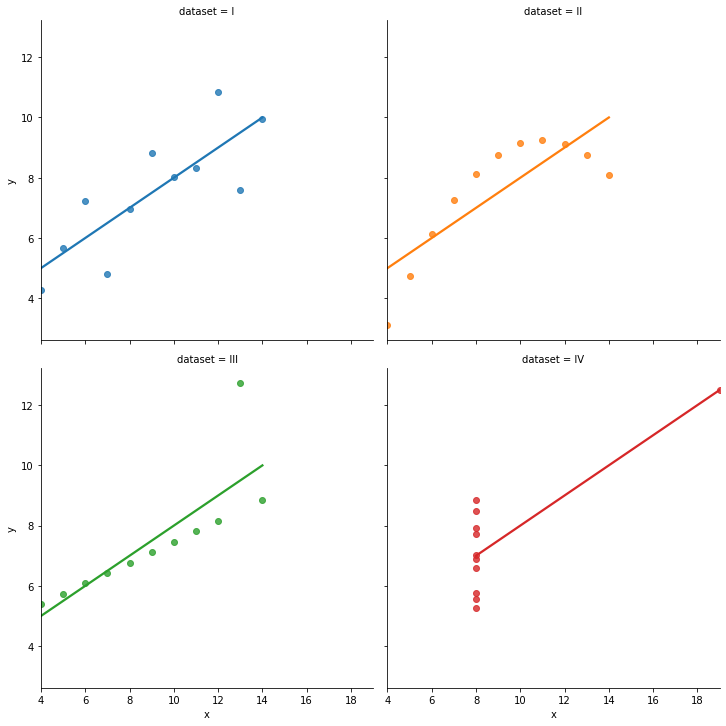

In [3]:
sns.lmplot(x="x", 
           y="y", 
           col="dataset", 
           hue="dataset", 
           data=df,
           col_wrap=2,
           ci = None
           )

In [4]:
import bokeh.io
import bokeh.plotting
from bokeh.models import ColumnDataSource,Quad
from bokeh.plotting import figure, show,output_file
from bokeh.palettes import Set1_7
from bokeh.layouts import gridplot

bokeh.io.output_notebook()

In [5]:
figs = []
plot_options = dict(plot_height = 400, plot_width = 600)


for i, dataset in enumerate(df['dataset'].unique()):
    #title = 'Dataset = {}'.format(dataset)
    if i == 0:
        fig = figure(**plot_options, title='Dataset = {}'.format(dataset))
    else:
        fig = figure(**plot_options, x_range = figs[0].x_range, y_range = figs[0].y_range,title='Dataset = {}'.format(dataset))
    x = df[df['dataset']==dataset]['x']
    y = df[df['dataset']==dataset]['y']
    slope,intercept = np.polyfit(x,y, 1)
    y_fit = [slope * i + intercept for i in x]
    source = ColumnDataSource({'x':x, 'y':y,'y_fit':y_fit})
    fig.circle(x='x',y='y',source=source, color = Set1_7[i],size=10)
    fig.line(x='x',y='y_fit',source=source,color = Set1_7[i],line_width=4,legend_label='y='+str(round(slope,2))+'x+'+str(round(intercept,2)))

    figs.append(fig)
grid = gridplot( [[figs[0],figs[1]],[figs[2],figs[3]]] )
show(grid)
